# Usage and more of the Calibrations Class [v1.1]

In [1]:
# imports
import os
import glob
import numpy

from matplotlib import pyplot

from pypeit import calibrations
from pypeit import pypeitsetup
from pypeit.core import fsort
from pypeit.core import pypsetup

from pypeit.spectrographs import keck_deimos
from pypeit.spectrographs.slitmask import SlitRegister

In [2]:
os.environ['PYPEIT_DEV']

'/Users/westfall/Work/packages/PypeIt-development-suite'

## Setup

In [3]:
#pypeit_file = os.path.join(os.environ['PYPEIT_DEV'], 'pypeit_files',
#                           'keck_deimos_830g_m.pypeit')
pypeit_file = os.path.join(os.environ['PYPEIT_DEV'], 'REDUX_OUT/Keck_DEIMOS/830G_M/',
                           'keck_deimos_830g_m.pypeit')

In [4]:
setupc = pypeitsetup.PypeItSetup.from_pypeit_file(pypeit_file)

[INFO]    :: util.py 431 parse_pypeit_file() - Loading the reduction file
[INFO]    :: util.py 456 parse_pypeit_file() - Found 4 raw data frames
[INFO]    :: util.py 468 parse_pypeit_file() - Input file loaded successfully


In [5]:
par, spec, fitstbl, setup_dict = setupc.run()

[WARNING] :: load.py 102 load_headers() - DICHNAME keyword not in header. Setting to None
[INFO]    :: load.py 139 load_headers() - Successfully loaded headers for file:
             /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.56927.fits.gz
[WARNING] :: load.py 102 load_headers() - DICHNAME keyword not in header. Setting to None
[INFO]    :: load.py 139 load_headers() - Successfully loaded headers for file:
             /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57161.fits.gz
[WARNING] :: load.py 102 load_headers() - DICHNAME keyword not in header. Setting to None
[INFO]    :: load.py 139 load_headers() - Successfully loaded headers for file:
             /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57006.fits.gz
[WARNING] :: load.py 102 load_headers() - DICHNAME keyword not in header. Setting to None
[INFO]    :: load.py 139 load_h

In [6]:
fsort.make_dirs(spec.spectrograph, par['calibrations']['caldir'], par['rdx']['scidir'],
                par['rdx']['qadir'], overwrite=True)


[INFO]    :: fsort.py 1116 make_dirs() - Creating Science directory
[INFO]    :: fsort.py 1119 make_dirs() - The following directory already exists:
             /Users/westfall/Work/packages/pypeit/doc/nb/Science
[INFO]    :: fsort.py 1139 make_dirs() - Creating Object directories
[INFO]    :: fsort.py 1177 make_dirs() - Creating Master Calibrations directory
[INFO]    :: fsort.py 1199 make_dirs() - Creating QA directory
[WARNING] :: fsort.py 1202 make_dirs() - Pre-existing QA plots will be overwritten


## Choose the detector, sci_ID

In [7]:
det = 1
sci_ID = 1
setup = pypsetup.instr_setup(sci_ID, det, fitstbl, setup_dict,
                             spec.detector[det-1]['numamplifiers'],
                             must_exist=True)
setup

'A_01_aa'

##  Calibrations

## Instantiate

In [8]:
caliBrate = calibrations.MultiSlitCalibrations(fitstbl, spectrograph=spec,
                                               par=par['calibrations'],
                                               save_masters=False, write_qa=False)

In [9]:
# Setup for a specific science frame + detector
caliBrate.reset(setup, det, sci_ID, par['calibrations'])

## Do it

In [10]:
_ = caliBrate.get_datasec_img()

[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.22358.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.22358.fits.gz


In [11]:
msbias = caliBrate.get_bias()

In [12]:
msarc = caliBrate.get_arc()

[INFO]    :: calibrations.py 195 get_arc() - Preparing a master arc frame
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.56927.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.56927.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.56927.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.56927.fits.gz
[INFO]    :: processimages.py 279 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processimages.py 289 bias_subtract() - Using overscan to subtact


In [13]:
msbpm = caliBrate.get_bpm()

[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.22358.fits.gz


In [14]:
pixlocn = caliBrate.get_pixlocn()

[INFO]    :: pixels.py 37 gen_pixloc() - Deriving physical pixel locations on the detector
[INFO]    :: pixels.py 40 gen_pixloc() - Pixel gap in the dispersion direction = 0.000
[INFO]    :: pixels.py 41 gen_pixloc() - Pixel size in the dispersion direction = 1.000
[INFO]    :: pixels.py 44 gen_pixloc() - Pixel gap in the spatial direction = 0.000
[INFO]    :: pixels.py 45 gen_pixloc() - Pixel size in the spatial direction = 1.000
[INFO]    :: pixels.py 50 gen_pixloc() - Saving pixel locations


In [15]:
tslits_dict, maskslits = caliBrate.get_slits(arms=True)

[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57006.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57161.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57006.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57006.fits.gz
[INFO]    :: keck_deimos.py 797 read_deimos() - Reading DEIMOS file: /Users/westfall/Work/packages/PypeIt-development-suite/RAW_DATA//Keck_DEIMOS/830G_M/DE.20100913.57006.fits.gz
[INFO]    :: processimages.py 279 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processim

In [16]:
caliBrate.traceSlits.show('edges')

In [17]:
trace_files = fsort.list_of_files(fitstbl, 'trace', sci_ID)
spec.get_slitmask(trace_files[0])
spec.get_detector_map()

In [18]:
spec_i = 3900
trace_slit_cen = (caliBrate.traceSlits.lcen[spec_i,:] + caliBrate.traceSlits.rcen[spec_i,:])/2
offset = spec.detector_map.npix[0]/2-spec.detector_map.ccd_center[0,0]
pix_per_mm = spec.telescope.platescale()/spec.detector[0]['platescale']
register = SlitRegister(trace_slit_cen, spec.slitmask.center[:,0],
                        guess_offset=offset, guess_scale=pix_per_mm,
                        offset_limits=[offset-100,offset+100],
                        scale_limits=[pix_per_mm/1.1, pix_per_mm*1.1],
                        fit=True)

Found 3 missing slits: [103, 102, 71]


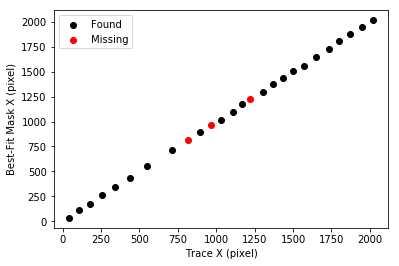

In [19]:
missing = register.missing_from_trace()
mask_pix = register.mask_to_trace_coo()
pyplot.scatter(trace_slit_cen, mask_pix[register.match_index], color='k', zorder=1,
               label='Found')
if len(missing) > 0:
    print('Found {0} missing slits: {1}'.format(len(missing), missing))
    pyplot.scatter(mask_pix[missing], mask_pix[missing], color='r', zorder=1,
                   label='Missing')
pyplot.xlabel('Trace X (pixel)')
pyplot.ylabel('Best-Fit Mask X (pixel)')
pyplot.legend()
pyplot.show()

array([[ 800,  834, 3900],
       [ 950,  984, 3900],
       [1188, 1254, 3900]])

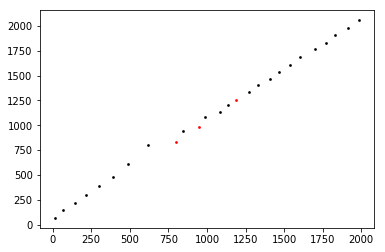

In [22]:
lr_offset = numpy.array([-0.5,0.5])[None,:]*spec.slitmask.length[missing][:,None]*register.par[1]
new_slits = numpy.append(mask_pix[missing][:,None] + lr_offset,
                         numpy.array([spec_i]*len(missing)).reshape(-1,1), axis=1).astype(int)
new_slits = new_slits[numpy.argsort(new_slits[:,0]),:]
pyplot.scatter(caliBrate.traceSlits.lcen[spec_i,:], caliBrate.traceSlits.rcen[spec_i,:],
               color='k', marker='.', s=30, lw=0)
pyplot.scatter(new_slits[:,0], new_slits[:,1],
               color='r', marker='.', s=30, lw=0)
new_slits

In [23]:
#caliBrate.traceSlits.add_user_slits([new_slits[0,:]], run_to_finish=True)
caliBrate.traceSlits.add_user_slits(new_slits, run_to_finish=True)

[INFO]    :: trace_slits.py 68 add_user_edges() - Adding a user-defined slit [x0, x1, yrow]:  [ 800  834 3900]
[INFO]    :: trace_slits.py 68 add_user_edges() - Adding a user-defined slit [x0, x1, yrow]:  [ 950  984 3900]
[INFO]    :: trace_slits.py 68 add_user_edges() - Adding a user-defined slit [x0, x1, yrow]:  [1188 1254 3900]
[INFO]    :: trace_slits.py 1309 fit_edges() - Fitting left slit traces
[INFO]    :: trace_slits.py 1311 fit_edges() - Fitting right slit traces
[INFO]    :: traceslits.py 779 _synchronize() - Synchronizing left and right slit traces
[INFO]    :: trace_slits.py 2438 synchronize_edges() - Relabelling slit edges
[WORK IN ]::
[PROGRESS]:: trace_slits.py 2080 pca_pixel_slit_edges() - May need to do a check here to make sure ofit is reasonable
[INFO]    :: trace_slits.py 2086 pca_pixel_slit_edges() - Performing a PCA on the slit traces
             pca.py 96 basis() -   Reduced chi-squared = 9.025751E-04


In [24]:
caliBrate.traceSlits.show('edges')
print('fubar')

fubar
